In [1]:
from matplotlib.image import imread
import cv2
from numba import njit
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as smal

#Preprocessing
pictures = np.zeros((877,4096,3))
vg_pic = np.zeros((877,64,64,3))
for i in range(1,877):
    a = imread(os.path.join('..','ML_HW2','van_gogh','Vincent_van_Gogh_' + str(i) + '.jpg'))
    if np.ndim(a) == 2:
        b = np.zeros((64,64,3))
        b[:,:,0] = a;
        b[:,:,1] = a;
        b[:,:,2] = a;
        a = b
    vg_pic[i,:,:,:] = a
    a = a.reshape(-1,a.shape[-1])#flatten array
    pictures[i,:,:] = a
    
pictures = pictures.astype('float64')
temp = pictures[:,:,0]
print(temp[0])
b_red = pictures[:,:,0] - np.mean(pictures[:,:,0],axis = 0)
print(b_red[0])
b_blue = pictures[:,:,2] - np.mean(pictures[:,:,2],axis = 0)
b_green = pictures[:,:,1] - np.mean(pictures[:,:,1],axis = 0)

[0. 0. 0. ... 0. 0. 0.]
[-144.58494869 -144.7936146  -143.90877993 ... -138.94868871 -137.58266819
 -139.02394527]


In [2]:
u_red, S_RED, VT_red = np.linalg.svd(b_red,full_matrices=False)
u_blue, S_BLUE, VT_blue = np.linalg.svd(b_blue,full_matrices=False)
u_green, S_GREEN, VT_green = np.linalg.svd(b_green,full_matrices=False)
s_red_100 = S_RED[:100]
s_blue_100 = S_BLUE[:100]
s_green_100 = S_GREEN[:100]
pca_red = u_red @ np.diag(S_RED)
pca_blue = u_blue @ np.diag(S_BLUE)
pca_green = u_green @ np.diag(S_GREEN)

<BarContainer object of 100 artists>

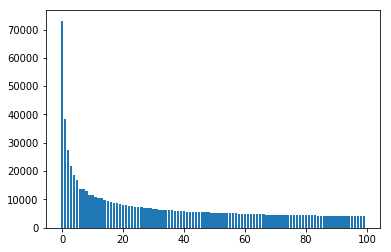

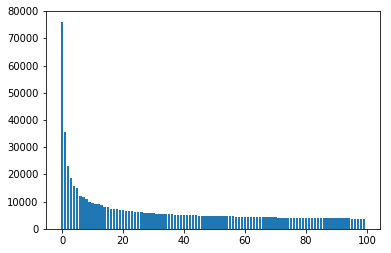

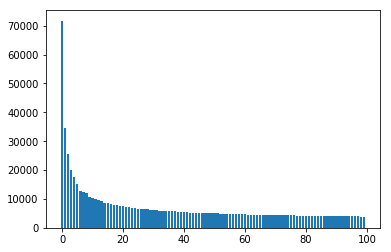

In [3]:
plt.figure(1)
plt.bar(np.arange(0,100),s_red_100 )
plt.figure(2)
plt.bar(np.arange(0,100),s_blue_100 )
plt.figure(3)
plt.bar(np.arange(0,100),s_green_100 )


In [13]:
PVE_red = sum(np.square(S_RED[0:10]) / 876) / sum(np.square(S_RED) / 876)
PVE_green = sum(np.square(S_GREEN[0:10]) / 876) / sum(np.square(S_GREEN) / 876)
PVE_blue = sum(np.square(S_BLUE[0:10]) / 876) / sum(np.square(S_BLUE) / 876)

In [14]:
print("PVE OF RED IS " +  str(PVE_red * 100)) #fraction of how much variance captured
print("PVE OF GREEN IS " +  str(PVE_green * 100)) #fraction of how much variance captured
print("PVE OF BLUE IS " +  str(PVE_blue * 100)) #fraction of how much variance captured
# plt.plot(np.cumsum(np.diag(S_RED))/np.sum(np.diag(S_RED)))


PVE OF RED IS 56.952779104771345
PVE OF GREEN IS 56.69988774278595
PVE OF BLUE IS 60.256005449434824


In [21]:
#Question 1.2
noisy_pictures = np.zeros((877,4096,3))
mean_vg = np.mean(vg_pic, axis=0)
var_vg = np.var(vg_pic, axis=0)
for i in range(1,877):
    x = imread(os.path.join('..','ML_HW2','van_gogh','Vincent_van_Gogh_' + str(i) + '.jpg'))
    if np.ndim(x) == 2:
        b = np.zeros((64,64,3))
        b[:,:,0] = x;
        b[:,:,1] = x;
        b[:,:,2] = x;
        x = b
    noisy_x = x + 0.01*np.random.normal(mean_vg,var_vg,(64,64,3))
    noisy_x = noisy_x.reshape(-1,noisy_x.shape[-1])#flatten array
    noisy_pictures[i,:,:] = noisy_x
noisy_pictures = noisy_pictures.astype('float64')
temp = pictures[:,:,0]
b_red = noisy_pictures[:,:,0] - np.mean(noisy_pictures[:,:,0],axis = 0)
b_blue = noisy_pictures[:,:,2] - np.mean(noisy_pictures[:,:,2],axis = 0)
b_green = noisy_pictures[:,:,1] - np.mean(noisy_pictures[:,:,1],axis = 0)

<BarContainer object of 100 artists>

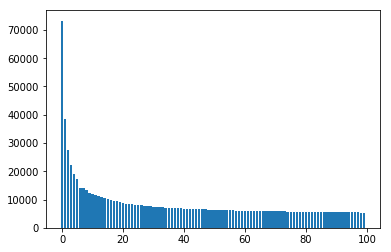

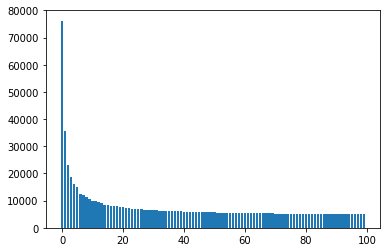

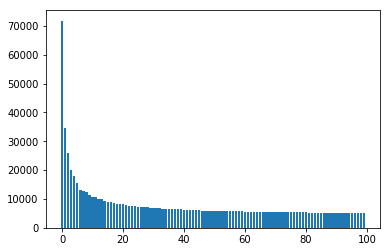

In [22]:
u_red, S_RED_NOISY, VT_red = np.linalg.svd(b_red,full_matrices=False)
u_blue, S_BLUE_NOISY, VT_blue = np.linalg.svd(b_blue,full_matrices=False)
u_green, S_GREEN_NOISY, VT_green = np.linalg.svd(b_green,full_matrices=False)

pca_red_noisy = u_red @ np.diag(S_RED)
pca_blue_noisy = u_blue @ np.diag(S_BLUE)
pca_green_noisy = u_green @ np.diag(S_GREEN)

plt.figure(1)
plt.bar(np.arange(0,100),S_RED_NOISY[0:100] )
plt.figure(2)
plt.bar(np.arange(0,100),S_BLUE_NOISY[0:100] )
plt.figure(3)
plt.bar(np.arange(0,100),S_GREEN_NOISY[0:100] )

In [24]:
S_RED_NOISY.shape

(877,)

In [23]:
PVE_red = sum(np.square(S_RED_NOISY[0:10]) / 876) / sum(np.square(S_RED_NOISY) / 876)
PVE_green = sum(np.square(S_GREEN_NOISY[0:10]) / 876) / sum(np.square(S_GREEN_NOISY) / 876)
PVE_blue = sum(np.square(S_BLUE_NOISY[0:10]) / 876) / sum(np.square(S_BLUE_NOISY) / 876)

print("PVE OF Noisy RED IS " +  str(PVE_red * 100)) #fraction of how much variance captured
print("PVE OF Noisy GREEN IS " +  str(PVE_green * 100)) #fraction of how much variance captured
print("PVE OF Noisy BLUE IS " +  str(PVE_blue * 100)) #fraction of how much variance captured
# plt.plot(np.cumsum(np.diag(S_RED))/np.sum(np.diag(S_RED)))

PVE OF Noisy RED IS 39.53599860732661
PVE OF Noisy GREEN IS 40.44046295817408
PVE OF Noisy BLUE IS 42.96609288544939
